In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import wget

In [208]:
df = pd.read_csv('hospital-beds.csv')

In [25]:
df.query('STATE_FIPS == 48')[['FIPS']].nunique()

FIPS    180
dtype: int64

In [60]:
df[df.STATE_FIPS == 48].FIPS.unique()

array([48001.0, 48003.0, 48005.0, 48013.0, 48015.0, 48021.0, 48023.0,
       48025.0, 48027.0, 48029.0, 48035.0, 48037.0, 48039.0, 48041.0,
       48043.0, 48049.0, 48051.0, 48053.0, 48055.0, 48057.0, 48061.0,
       48063.0, 48069.0, 48071.0, 48073.0, 48075.0, 48083.0, 48085.0,
       48087.0, 48089.0, 48093.0, 48097.0, 48205.0, 48113.0, 48397.0,
       48115.0, 48117.0, 48439.0, 48121.0, 48123.0, 48285.0, 48127.0,
       48133.0, 48135.0, 48139.0, 48141.0, 48143.0, 48145.0, 48147.0,
       48149.0, 48151.0, 48153.0, 48157.0, 48161.0, 48163.0, 48167.0,
       48171.0, 48177.0, 48179.0, 48181.0, 48183.0, 48185.0, 48187.0,
       48189.0, 48193.0, 48195.0, 48201.0, 48339.0, 48203.0, 48209.0,
       48211.0, 48213.0, 48215.0, 48217.0, 48219.0, 48221.0, 48223.0,
       48227.0, 48231.0, 48233.0, 48237.0, 48241.0, 48245.0, 48249.0,
       48251.0, 48253.0, 48255.0, 48257.0, 48265.0, 48273.0, 48275.0,
       48277.0, 48279.0, 48281.0, 48293.0, 48299.0, 48303.0, 48309.0,
       48313.0, 4832

In [61]:
df[df.STATE_FIPS == 48].FIPS

3554    48001
3555    48003
3556    48005
3557    48005
3558    48013
        ...  
6610    48201
6614    48113
6615    48201
6616    48453
6619    48021
Name: FIPS, Length: 650, dtype: object

In [62]:
df[df.FIPS == 48001]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
3554,-95.628021,31.732734,3555,Palestine Regional Medical Center,Short Term Acute Care Hospital,2900 S Loop 256,NaN,Palestine,TX,75801,...,1,48001,156.0,150.0,10,10,0.0,0.427374,6,2.0


In [63]:
df.STATE_FIPS.isnan()

AttributeError: 'Series' object has no attribute 'isnan'

In [77]:
pd.isnull(df.STATE_FIPS)

0       False
1       False
2       False
3       False
4       False
        ...  
6616    False
6617    False
6618    False
6619    False
6620    False
Name: STATE_FIPS, Length: 6621, dtype: bool

In [78]:
df.size()

TypeError: 'numpy.int32' object is not callable

In [79]:
df.size

152283

In [7]:
df[df.isnull().any(axis=1)]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,NaN,Phoenix,AZ,85012,...,13.0,4013.0,62.0,62.0,0,0,NaN,NaN,0,0.0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,NaN,Tucson,AZ,85723,...,19.0,4019.0,295.0,295.0,2,2,NaN,NaN,0,2.0
2,-119.779742,36.773323,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,NaN,Fresno,CA,93703,...,19.0,6019.0,54.0,54.0,2,2,NaN,NaN,0,2.0
3,-72.957610,41.284400,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,NaN,West Haven,CT,6516,...,9.0,9009.0,216.0,216.0,1,1,NaN,NaN,0,2.0
4,-75.606533,39.740206,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,NaN,Wilmington,DE,19805,...,3.0,10003.0,62.0,62.0,0,0,NaN,NaN,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616,-97.863259,30.265422,6617,Baylor Scott & White Medical Center - Austin,Short Term Acute Care Hospital,5245 W US Hwy 290 Service Rd,NaN,Austin,TX,78735,...,453.0,48453.0,NaN,NaN,0,0,NaN,NaN,0,NaN
6617,-77.590908,37.638044,6618,Sheltering Arms Institute,Rehabilitation Hospital,2000 Wilkes Ridge Pl,NaN,Richmond,VA,23233,...,87.0,51087.0,NaN,NaN,0,0,NaN,NaN,0,NaN
6618,-93.750015,32.495213,6619,Ochsner LSU Health Shreveport - St Mary Medica...,Short Term Acute Care Hospital,1 Saint Mary Pl,NaN,Shreveport,LA,71101,...,17.0,22017.0,NaN,NaN,0,0,NaN,NaN,0,NaN
6619,-97.280937,30.101578,6620,Ascension Seton Bastrop,Short Term Acute Care Hospital,630 Highway 71 W,NaN,Bastrop,TX,78602,...,21.0,48021.0,NaN,NaN,0,0,NaN,NaN,0,NaN


In [81]:
df[df.FIPS.isnull()]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
4264,-170.685773,-14.290190,4265,LBJ Tropical Medical Center,Short Term Acute Care Hospital,Fagaalu Village,NaN,Pago Pago,AS,96799,...,NaN,NaN,120.0,120.0,21,21,NaN,NaN,0,2.0
4265,144.776100,13.497600,4266,Guam Memorial Hospital Authority,Short Term Acute Care Hospital,850 Gov Carlos G Camacho Rd,NaN,Tamuning,GU,96913,...,NaN,NaN,161.0,161.0,14,14,0.0,0.644108,0,2.0
4266,145.724170,15.210586,4267,Commonwealth Health Center,Short Term Acute Care Hospital,1 Lower Navy Hill Rd,NaN,Saipan,MP,96950,...,NaN,NaN,74.0,74.0,4,4,0.0,0.525324,0,NaN
4271,NaN,NaN,4272,Bayamon Medical Center (FKA Hospital Hermanos ...,Short Term Acute Care Hospital,KM 11 7 PR-2,NaN,Bayamon,PR,960,...,NaN,NaN,253.0,253.0,21,21,0.0,0.388066,0,2.0
4278,NaN,NaN,4279,Cayey Mennonite Medical Center,Short Term Acute Care Hospital,Carretera 14 Interior Km. 0.3 Barrio Rincón Se...,NaN,Cayey,PR,737,...,NaN,NaN,225.0,225.0,35,35,0.0,0.632925,0,3.0
4280,NaN,NaN,4281,Mennonite Hospital Guayama (FKA Episcopal Hosp...,Short Term Acute Care Hospital,Calle Principal Urb La Hacienda,NaN,Guayama,PR,785,...,NaN,NaN,116.0,116.0,6,6,0.0,0.634247,0,2.0
4287,NaN,NaN,4288,Hospital Perea,Short Term Acute Care Hospital,15 Calle Doctor Basora,NaN,Mayaguez,PR,681,...,NaN,NaN,118.0,118.0,4,4,8.0,0.684398,0,2.0
4288,NaN,NaN,4289,Mayaguez Medical Center (AKA Centro Medico De ...,Short Term Acute Care Hospital,410 Ave Hostos,NaN,Mayaguez,PR,681,...,NaN,NaN,195.0,195.0,31,31,0.0,0.751753,0,3.0
4292,NaN,NaN,4293,Hospital Oncologico Andres Grillasca,Short Term Acute Care Hospital,1000 Tito Castro Blvd,NaN,Ponce,PR,733,...,NaN,NaN,86.0,86.0,15,15,NaN,NaN,0,0.0
4303,NaN,NaN,4304,University District Hospital,Short Term Acute Care Hospital,Barrio Monacillos Centro Medico,NaN,Rio Piedras,PR,927,...,NaN,NaN,215.0,215.0,15,15,0.0,0.786607,0,2.0


In [175]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

X                         18
Y                         18
HQ_ADDRESS1             6253
COUNTY_NAME               25
STATE_NAME                25
STATE_FIPS                25
CNTY_FIPS                 25
FIPS                      25
NUM_LICENSED_BEDS        148
NUM_STAFFED_BEDS         236
PEDI_ICU_BEDS            737
BED_UTILIZATION          711
AVG_VENTILATOR_USAGE      75
dtype: int64

In [93]:
df[df.BED_UTILIZATION.isnull()].HQ_STATE.unique().size

54

In [105]:
df.query('BED_UTILIZATION != BED_UTILIZATION').groupby('HQ_STATE')['HQ_STATE'].count()

HQ_STATE
AK      5
AL     10
AR      8
AS      1
AZ     17
CA     67
CO     13
CT      7
DC      2
DE      1
FL     25
GA     16
GU      1
HI      5
IA      5
ID      6
IL     16
IN     18
KS     17
KY      7
LA     25
MA     18
MD     10
ME      1
MI     11
MN      7
MO     15
MS      8
MT      1
NC     16
ND      4
NE      3
NH      4
NJ      9
NM      5
NV     11
NY     40
OH     25
OK     17
OR      8
PA     29
PR     11
RI      2
SC     12
SD      5
TN     10
TX    100
UT      5
VA     16
VT      1
WA     16
WI      6
WV      9
WY      4
Name: HQ_STATE, dtype: int64

In [176]:
beds_df = df.dropna(subset=['BED_UTILIZATION'])

In [177]:
beds_df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
9,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,NaN,Flowood,MS,39232,...,121.0,28121.0,160.0,160.0,10,10,20.0,0.279868,0,2.0
17,-86.451938,32.463778,18,Prattville Baptist Hospital,Short Term Acute Care Hospital,124 S Memorial Dr,NaN,Prattville,AL,36067,...,1.0,1001.0,85.0,55.0,6,6,0.0,0.623113,30,2.0
18,-87.888307,30.519027,19,Thomas Hospital,Short Term Acute Care Hospital,750 Morphy Ave,NaN,Fairhope,AL,36532,...,3.0,1003.0,150.0,129.0,17,17,0.0,0.770054,21,3.0
19,-87.785172,30.903945,20,North Baldwin Infirmary,Short Term Acute Care Hospital,1815 Hand Ave,NaN,Bay Minette,AL,36507,...,3.0,1003.0,58.0,55.0,4,4,0.0,0.285131,3,2.0
20,-85.156357,31.888764,21,Medical Center Barbour,Short Term Acute Care Hospital,820 W Washington St,NaN,Eufaula,AL,36027,...,5.0,1005.0,74.0,30.0,5,5,0.0,0.378721,44,2.0


In [11]:
beds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 9 to 6591
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                5897 non-null   float64
 1   Y                                5897 non-null   float64
 2   OBJECTID                         5910 non-null   int64  
 3   HOSPITAL_NAME                    5910 non-null   object 
 4   HOSPITAL_TYPE                    5910 non-null   object 
 5   HQ_ADDRESS                       5910 non-null   object 
 6   HQ_ADDRESS1                      321 non-null    object 
 7   HQ_CITY                          5910 non-null   object 
 8   HQ_STATE                         5910 non-null   object 
 9   HQ_ZIP_CODE                      5910 non-null   int64  
 10  COUNTY_NAME                      5892 non-null   object 
 11  STATE_NAME                       5892 non-null   object 
 12  STATE_FIPS          

In [12]:
beds_columns = beds_df.columns[beds_df.isnull().any()]
beds_df[beds_columns].isnull().sum()

X                         13
Y                         13
HQ_ADDRESS1             5589
COUNTY_NAME               18
STATE_NAME                18
STATE_FIPS                18
CNTY_FIPS                 18
FIPS                      18
PEDI_ICU_BEDS             43
AVG_VENTILATOR_USAGE      11
dtype: int64

In [12]:
beds_df.dropna(subset=['FIPS'], inplace=True)

C:\Users\josyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
beds_columns = beds_df.columns[beds_df.isnull().any()]
beds_df[beds_columns].isnull().sum()

HQ_ADDRESS1             5574
PEDI_ICU_BEDS             43
AVG_VENTILATOR_USAGE      10
dtype: int64

In [178]:
beds_df.reset_index()

,index,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,9,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,NaN,Flowood,MS,...,121.0,28121.0,160.0,160.0,10,10,20.0,0.279868,0,2.0
1,17,-86.451938,32.463778,18,Prattville Baptist Hospital,Short Term Acute Care Hospital,124 S Memorial Dr,NaN,Prattville,AL,...,1.0,1001.0,85.0,55.0,6,6,0.0,0.623113,30,2.0
2,18,-87.888307,30.519027,19,Thomas Hospital,Short Term Acute Care Hospital,750 Morphy Ave,NaN,Fairhope,AL,...,3.0,1003.0,150.0,129.0,17,17,0.0,0.770054,21,3.0
3,19,-87.785172,30.903945,20,North Baldwin Infirmary,Short Term Acute Care Hospital,1815 Hand Ave,NaN,Bay Minette,AL,...,3.0,1003.0,58.0,55.0,4,4,0.0,0.285131,3,2.0
4,20,-85.156357,31.888764,21,Medical Center Barbour,Short Term Acute Care Hospital,820 W Washington St,NaN,Eufaula,AL,...,5.0,1005.0,74.0,30.0,5,5,0.0,0.378721,44,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,6511,-106.573371,31.872698,6512,Rio Vista Behavioral Health,Psychiatric Hospital,1390 Northwestern Dr,NaN,El Paso,TX,...,141.0,48141.0,80.0,80.0,0,0,NaN,0.381939,0,0.0
5906,6518,-80.827920,28.641375,6519,Palm Point Behavioral Health,Psychiatric Hospital,2355 Truman Scarborough Way,NaN,Titusville,FL,...,9.0,12009.0,74.0,74.0,0,0,NaN,0.287718,0,0.0
5907,6529,-77.413681,35.615738,6530,Walter B Jones Center Lakeside Psychiatric Hos...,Psychiatric Hospital,2577 W 5th St,NaN,Greenville,NC,...,147.0,37147.0,48.0,48.0,0,0,0.0,0.556414,0,0.0
5908,6530,-108.568794,45.772102,6531,The Rehabilitation Hospital of Montana,Rehabilitation Hospital,3572 Hesper Rd,NaN,Billings,MT,...,111.0,30111.0,34.0,34.0,0,0,NaN,0.335347,0,0.0


In [16]:
beds_df.query('HQ_ADDRESS1 == HQ_ADDRESS1')

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
31,-85.823822,33.277147,32,Clay County Hospital,Short Term Acute Care Hospital,83825 Highway 9,PO BOX 1270,Ashland,AL,36251,...,27.0,1027.0,45.0,46.0,4,4,0.0,0.280643,-1,2.0
106,-161.727100,60.749400,107,Yukon-Kuskokwim Delta Regional Hospital,Short Term Acute Care Hospital,829 Chief Eddie Hoffman Hwy,P.O. Box 528,Bethel,AK,99559,...,50.0,2050.0,50.0,34.0,6,6,0.0,0.399919,16,1.0
119,-131.722900,56.314700,120,Wrangell Medical Center,Critical Access Hospital,310 Bennett St,PO Box 1081,Wrangell,AK,99929,...,275.0,2275.0,8.0,8.0,1,1,0.0,0.287568,0,0.0
124,-109.458900,35.605300,125,Sage Memorial Hospital,Critical Access Hospital,US-191 & AZ-264,PO Box 457,Ganado,AZ,86505,...,1.0,4001.0,25.0,25.0,4,4,0.0,0.104219,0,1.0
162,-111.891233,33.333754,163,Dignity Health Arizona Specialty Hospital (FKA...,Short Term Acute Care Hospital,2905 W Warner Rd,Suite 1,Chandler,AZ,85224,...,13.0,4013.0,24.0,24.0,4,4,0.0,0.229795,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,-90.179498,32.315054,6334,Select Specialty Hospital - Belhaven,Long Term Acute Care Hospital,1225 N State St,5th Floor,Jackson,MS,39202,...,49.0,28049.0,25.0,25.0,7,7,0.0,0.958904,0,4.0
6351,-89.115332,30.366709,6352,Encompass Health Rehabilitation Hospital - Par...,Rehabilitation Hospital,4500 13th St,Ste 900,Gulfport,MS,39501,...,47.0,28047.0,33.0,33.0,0,0,0.0,0.933084,0,0.0
6418,-115.223327,36.121439,6419,Sana Behavioral Health,Psychiatric Hospital,5975 W Twain Ave,Ste B,Las Vegas,NV,89103,...,3.0,32003.0,19.0,19.0,0,0,0.0,0.479699,0,0.0
6436,-75.867700,41.256500,6437,PAM Specialty Hospital of Wilkes-Barre,Long Term Acute Care Hospital,575 N River St,7th Floor,Wilkes Barre,PA,18764,...,79.0,42079.0,36.0,36.0,6,6,0.0,0.516134,0,2.0


In [179]:
beds_df.HQ_ADDRESS1.fillna('', inplace=True)

C:\Users\josyu\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [196]:
beds_df.PEDI_ICU_BEDS.fillna(0, inplace=True)

C:\Users\josyu\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [197]:
beds_df.AVG_VENTILATOR_USAGE.fillna(0.0, inplace=True)

In [20]:
beds_columns = beds_df.columns[beds_df.isnull().any()]
beds_df[beds_columns].isnull().sum()

Series([], dtype: float64)

In [17]:
beds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 9 to 6591
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                5892 non-null   float64
 1   Y                                5892 non-null   float64
 2   OBJECTID                         5892 non-null   int64  
 3   HOSPITAL_NAME                    5892 non-null   object 
 4   HOSPITAL_TYPE                    5892 non-null   object 
 5   HQ_ADDRESS                       5892 non-null   object 
 6   HQ_ADDRESS1                      5892 non-null   object 
 7   HQ_CITY                          5892 non-null   object 
 8   HQ_STATE                         5892 non-null   object 
 9   HQ_ZIP_CODE                      5892 non-null   int64  
 10  COUNTY_NAME                      5892 non-null   object 
 11  STATE_NAME                       5892 non-null   object 
 12  STATE_FIPS          

In [22]:
beds_df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
9,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,39232,...,121.0,28121.0,160.0,160.0,10,10,20.0,0.279868,0,2.0
17,-86.451938,32.463778,18,Prattville Baptist Hospital,Short Term Acute Care Hospital,124 S Memorial Dr,,Prattville,AL,36067,...,1.0,1001.0,85.0,55.0,6,6,0.0,0.623113,30,2.0
18,-87.888307,30.519027,19,Thomas Hospital,Short Term Acute Care Hospital,750 Morphy Ave,,Fairhope,AL,36532,...,3.0,1003.0,150.0,129.0,17,17,0.0,0.770054,21,3.0
19,-87.785172,30.903945,20,North Baldwin Infirmary,Short Term Acute Care Hospital,1815 Hand Ave,,Bay Minette,AL,36507,...,3.0,1003.0,58.0,55.0,4,4,0.0,0.285131,3,2.0
20,-85.156357,31.888764,21,Medical Center Barbour,Short Term Acute Care Hospital,820 W Washington St,,Eufaula,AL,36027,...,5.0,1005.0,74.0,30.0,5,5,0.0,0.378721,44,2.0


In [198]:
beds_df.reset_index()

,index,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,9,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,...,121.0,28121.0,160.0,160.0,10,10,20.0,0.279868,0,2.0
1,17,-86.451938,32.463778,18,Prattville Baptist Hospital,Short Term Acute Care Hospital,124 S Memorial Dr,,Prattville,AL,...,1.0,1001.0,85.0,55.0,6,6,0.0,0.623113,30,2.0
2,18,-87.888307,30.519027,19,Thomas Hospital,Short Term Acute Care Hospital,750 Morphy Ave,,Fairhope,AL,...,3.0,1003.0,150.0,129.0,17,17,0.0,0.770054,21,3.0
3,19,-87.785172,30.903945,20,North Baldwin Infirmary,Short Term Acute Care Hospital,1815 Hand Ave,,Bay Minette,AL,...,3.0,1003.0,58.0,55.0,4,4,0.0,0.285131,3,2.0
4,20,-85.156357,31.888764,21,Medical Center Barbour,Short Term Acute Care Hospital,820 W Washington St,,Eufaula,AL,...,5.0,1005.0,74.0,30.0,5,5,0.0,0.378721,44,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,6511,-106.573371,31.872698,6512,Rio Vista Behavioral Health,Psychiatric Hospital,1390 Northwestern Dr,,El Paso,TX,...,141.0,48141.0,80.0,80.0,0,0,0.0,0.381939,0,0.0
5906,6518,-80.827920,28.641375,6519,Palm Point Behavioral Health,Psychiatric Hospital,2355 Truman Scarborough Way,,Titusville,FL,...,9.0,12009.0,74.0,74.0,0,0,0.0,0.287718,0,0.0
5907,6529,-77.413681,35.615738,6530,Walter B Jones Center Lakeside Psychiatric Hos...,Psychiatric Hospital,2577 W 5th St,,Greenville,NC,...,147.0,37147.0,48.0,48.0,0,0,0.0,0.556414,0,0.0
5908,6530,-108.568794,45.772102,6531,The Rehabilitation Hospital of Montana,Rehabilitation Hospital,3572 Hesper Rd,,Billings,MT,...,111.0,30111.0,34.0,34.0,0,0,0.0,0.335347,0,0.0


In [121]:
beds_df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
9,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,39232,...,121,28121,160.0,160.0,10,10,20.0,0.279868,0,2.0
17,-86.451938,32.463778,18,Prattville Baptist Hospital,Short Term Acute Care Hospital,124 S Memorial Dr,,Prattville,AL,36067,...,1,1001,85.0,55.0,6,6,0.0,0.623113,30,2.0
18,-87.888307,30.519027,19,Thomas Hospital,Short Term Acute Care Hospital,750 Morphy Ave,,Fairhope,AL,36532,...,3,1003,150.0,129.0,17,17,0.0,0.770054,21,3.0
19,-87.785172,30.903945,20,North Baldwin Infirmary,Short Term Acute Care Hospital,1815 Hand Ave,,Bay Minette,AL,36507,...,3,1003,58.0,55.0,4,4,0.0,0.285131,3,2.0
20,-85.156357,31.888764,21,Medical Center Barbour,Short Term Acute Care Hospital,820 W Washington St,,Eufaula,AL,36027,...,5,1005,74.0,30.0,5,5,0.0,0.378721,44,2.0


In [24]:
beds_df.HOSPITAL_TYPE.unique()

array(['Short Term Acute Care Hospital', 'Critical Access Hospital',
       'Childrens Hospital', 'Long Term Acute Care Hospital',
       'Rehabilitation Hospital', 'Psychiatric Hospital',
       'Religious Non-Medical Health Care Institution'], dtype=object)

In [127]:
os.system("wget https://www.ers.usda.gov/webdocs/DataFiles/48747/PovertyEstimates.xls -O usda_poverty.xls")

1

In [129]:
poverty_lvl_url = 'https://www.ers.usda.gov/webdocs/DataFiles/48747/PovertyEstimates.xls'
wget.download(poverty_lvl_url, 'usda_poverty.xls')

100% [............................................................................] 983552 / 983552

'usda_poverty.xls'

In [199]:
usda_povery_df = pd.read_excel('usda_poverty.xls', sheet_name="Poverty Data 2018", skiprows=4)

In [200]:
usda_povery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FIPStxt                          3193 non-null   int64  
 1   Stabr                            3193 non-null   object 
 2   Area_name                        3193 non-null   object 
 3   Rural-urban_Continuum_Code_2003  3136 non-null   float64
 4   Urban_Influence_Code_2003        3136 non-null   float64
 5   Rural-urban_Continuum_Code_2013  3141 non-null   float64
 6   Urban_Influence_Code_2013        3141 non-null   float64
 7   POVALL_2018                      3193 non-null   int64  
 8   CI90LBAll_2018                   3193 non-null   int64  
 9   CI90UBALL_2018                   3193 non-null   int64  
 10  PCTPOVALL_2018                   3193 non-null   float64
 11  CI90LBALLP_2018                  3193 non-null   float64
 12  CI90UBALLP_2018     

In [184]:
usda_povery_df.head()

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,CI90LBAll_2018,CI90UBALL_2018,...,CI90UB517P_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,POV04_2018,CI90LB04_2018,CI90UB04_2018,PCTPOV04_2018,CI90LB04P_2018,CI90UB04P_2018
0,0,US,United States,NaN,NaN,NaN,NaN,41852315,41619366,42085264,...,17.2,61937,61843,62031,3758704.0,3714862.0,3802546.0,19.5,19.3,19.7
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,801758,785668,817848,...,23.7,49881,49123,50639,73915.0,69990.0,77840.0,26.0,24.6,27.4
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,7587,6334,8840,...,23.9,59338,53628,65048,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,21069,17390,24748,...,16.9,57588,54437,60739,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,6788,5662,7914,...,45.9,34382,31157,37607,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
beds_df.FIPS

9       28121
17       1001
18       1003
19       1003
20       1005
        ...  
6511    48141
6518    12009
6529    37147
6530    30111
6591    22073
Name: FIPS, Length: 5892, dtype: object

In [134]:
usda_povery_df.FIPStxt

0           0
1        1000
2        1001
3        1003
4        1005
        ...  
3188    56037
3189    56039
3190    56041
3191    56043
3192    56045
Name: FIPStxt, Length: 3193, dtype: int64

In [136]:
usda_povery_df.FIPStxt.unique().size

3193

In [137]:
beds_df.FIPS.unique().size

2487

In [201]:
usda_povery_df.rename(columns={"FIPStxt": "FIPS"}, inplace=True)

In [202]:
us_poverty_df = usda_povery_df[['FIPS', 'PCTPOVALL_2018']]

In [203]:
us_poverty_df.head()

,FIPS,PCTPOVALL_2018
0,0,13.1
1,1000,16.8
2,1001,13.8
3,1003,9.8
4,1005,30.9


In [204]:
us_poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3193 non-null   int64  
 1   PCTPOVALL_2018  3193 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.0 KB


In [205]:
beds_df[['FIPS', 'BED_UTILIZATION']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 9 to 6591
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS             5892 non-null   float64
 1   BED_UTILIZATION  5910 non-null   float64
dtypes: float64(2)
memory usage: 138.5 KB


In [206]:
beds_df[['FIPS', 'STATE_FIPS', 'CNTY_FIPS']].head()

,FIPS,STATE_FIPS,CNTY_FIPS
9,28121.0,28.0,121.0
17,1001.0,1.0,1.0
18,1003.0,1.0,3.0
19,1003.0,1.0,3.0
20,1005.0,1.0,5.0


In [194]:
beds_df[['FIPS', 'STATE_FIPS', 'CNTY_FIPS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 9 to 6591
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIPS        5892 non-null   float64
 1   STATE_FIPS  5892 non-null   float64
 2   CNTY_FIPS   5892 non-null   float64
dtypes: float64(3)
memory usage: 184.7 KB


In [207]:
beds_df[['STATE_FIPS', 'CNTY_FIPS', 'FIPS']] = beds_df[['STATE_FIPS', 'CNTY_FIPS', 'FIPS']].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [49]:
beds_df[['FIPS', 'STATE_FIPS', 'CNTY_FIPS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 9 to 6591
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   FIPS        5892 non-null   int64
 1   STATE_FIPS  5892 non-null   int64
 2   CNTY_FIPS   5892 non-null   int64
dtypes: int64(3)
memory usage: 184.1 KB


In [51]:
beds_df[['FIPS', 'STATE_FIPS', 'CNTY_FIPS']].head()

,FIPS,STATE_FIPS,CNTY_FIPS
9,28121,28,121
17,1001,1,1
18,1003,1,3
19,1003,1,3
20,1005,1,5


In [25]:
beds_poverty_df = beds_df.merge(us_poverty_df, on='FIPS')

In [27]:
beds_poverty_df['PCTBED_UTILIZATION'] = beds_poverty_df[['BED_UTILIZATION']]*100

In [28]:
beds_poverty_df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION
0,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,39232,...,160.0,160.0,10,10,20.0,0.279868,0,2.0,9.6,27.986822
1,-90.101250,32.329541,2122,Merit Health Womans Hospital (FKA Womans Hospi...,Short Term Acute Care Hospital,1026 N Flowood Dr,,Flowood,MS,39232,...,109.0,34.0,16,16,16.0,0.254714,75,1.0,9.6,25.471395
2,-90.034841,32.286473,2155,Merit Health Rankin (FKA Crossgates River Oaks...,Short Term Acute Care Hospital,350 Crossgates Blvd,,Brandon,MS,39042,...,134.0,114.0,8,8,0.0,0.137900,20,2.0,9.6,13.789955
3,-90.071900,32.235500,2156,Whitfield Medical Surgical Hospital,Short Term Acute Care Hospital,3550 Highway 468 W,Bldg 60,Whitfield,MS,39193,...,43.0,32.0,6,6,0.0,0.102397,11,0.0,9.6,10.239726
4,-89.754900,32.377843,2158,Scott Regional Hospital (AKA Scott Regional Me...,Critical Access Hospital,317 Highway 13 S,,Morton,MS,39117,...,25.0,25.0,4,4,0.0,0.335562,0,0.0,9.6,33.556163


In [29]:
beds_poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5848
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                5849 non-null   float64
 1   Y                                5849 non-null   float64
 2   OBJECTID                         5849 non-null   int64  
 3   HOSPITAL_NAME                    5849 non-null   object 
 4   HOSPITAL_TYPE                    5849 non-null   object 
 5   HQ_ADDRESS                       5849 non-null   object 
 6   HQ_ADDRESS1                      5849 non-null   object 
 7   HQ_CITY                          5849 non-null   object 
 8   HQ_STATE                         5849 non-null   object 
 9   HQ_ZIP_CODE                      5849 non-null   int64  
 10  COUNTY_NAME                      5849 non-null   object 
 11  STATE_NAME                       5849 non-null   object 
 12  STATE_FIPS          

In [56]:
beds_poverty_df['HOSPITAL_TYPE'].unique()

array(['Short Term Acute Care Hospital', 'Critical Access Hospital',
       'Psychiatric Hospital', 'Long Term Acute Care Hospital',
       'Rehabilitation Hospital', 'Childrens Hospital',
       'Religious Non-Medical Health Care Institution'], dtype=object)

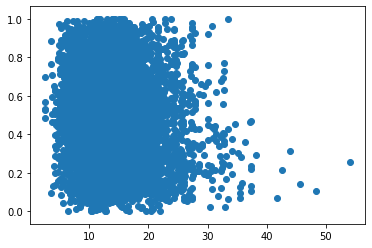

In [57]:
plt.scatter(data = beds_poverty_df, x = 'PCTPOVALL_2018', y = 'BED_UTILIZATION')

In [58]:
beds_poverty_df[['PCTPOVALL_2018', 'BED_UTILIZATION']].describe()

,PCTPOVALL_2018,BED_UTILIZATION
count,5849.000000,5849.000000
mean,14.245392,0.491357
std,5.268514,0.235749
min,2.600000,0.000721
25%,10.600000,0.299330
50%,13.800000,0.496767
75%,16.800000,0.677041
max,54.000000,1.000000


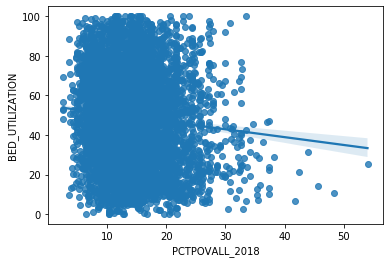

In [61]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
sb.regplot(beds_poverty_df['PCTPOVALL_2018'], beds_poverty_df['BED_UTILIZATION']*100);
#plt.scatter(data = beds_poverty_df, x = 'PCTPOVALL_2018', y = 'BED_UTILIZATION')


In [74]:
#beds_poverty_df['PCTBED_UTILIZATION'] = beds_poverty_df[['BED_UTILIZATION']]*100

In [73]:
beds_poverty_df.groupby('HQ_STATE')['PCTPOVALL_2018'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
MS,21.479245,106
NM,20.905660,53
LA,19.680597,201
KY,18.541071,112
WV,18.463158,57


In [84]:
top_bedusage_states = beds_poverty_df.groupby('HQ_STATE')['PCTBED_UTILIZATION'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

In [96]:
top_bedusage_states.index.tolist()

['DE', 'DC', 'MD', 'MA', 'NJ']

In [97]:
beds_poverty_df[beds_poverty_df['HQ_STATE'].isin(top_bedusage_states.index.tolist())].groupby('HQ_STATE')['PCTPOVALL_2018'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
DC,16.100000,12
DE,12.226667,15
MD,11.693220,59
MA,10.759794,97
NJ,9.709474,95


In [81]:
beds_poverty_df[beds_poverty_df['HQ_STATE'].isin(['MS', 'NM', 'LA', 'KY', 'WV'])].groupby('HQ_STATE')['PCTBED_UTILIZATION'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
WV,48.364279,57
LA,48.136299,201
KY,46.063477,112
MS,43.072572,106
NM,42.887235,53


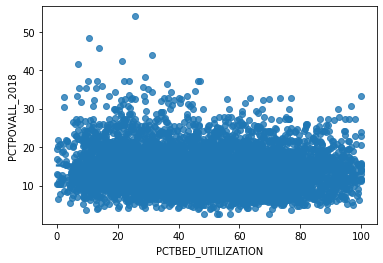

In [82]:
sb.regplot(beds_poverty_df['PCTBED_UTILIZATION'], beds_poverty_df['PCTPOVALL_2018']);

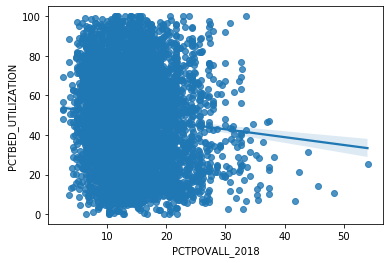

In [83]:
sb.regplot(beds_poverty_df['PCTPOVALL_2018'], beds_poverty_df['PCTBED_UTILIZATION']);

In [98]:
beds_poverty_df[['PCTPOVALL_2018', 'PCTBED_UTILIZATION']].describe()

,PCTPOVALL_2018,PCTBED_UTILIZATION
count,5849.000000,5849.000000
mean,14.245392,49.135749
std,5.268514,23.574880
min,2.600000,0.072098
25%,10.600000,29.932964
50%,13.800000,49.676713
75%,16.800000,67.704111
max,54.000000,100.000000


In [99]:
beds_poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5848
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                5849 non-null   float64
 1   Y                                5849 non-null   float64
 2   OBJECTID                         5849 non-null   int64  
 3   HOSPITAL_NAME                    5849 non-null   object 
 4   HOSPITAL_TYPE                    5849 non-null   object 
 5   HQ_ADDRESS                       5849 non-null   object 
 6   HQ_ADDRESS1                      5849 non-null   object 
 7   HQ_CITY                          5849 non-null   object 
 8   HQ_STATE                         5849 non-null   object 
 9   HQ_ZIP_CODE                      5849 non-null   int64  
 10  COUNTY_NAME                      5849 non-null   object 
 11  STATE_NAME                       5849 non-null   object 
 12  STATE_FIPS          

In [103]:
beds_poverty_df['HOSPITAL_TYPE'].unique()
#hospital_types = beds_poverty_df[['HOSPITAL_TYPE']].unique()
#pd.api.types.CategoricalDtype(ordered=True, categories=fuel_make_filter.index)

array(['Short Term Acute Care Hospital', 'Critical Access Hospital',
       'Psychiatric Hospital', 'Long Term Acute Care Hospital',
       'Rehabilitation Hospital', 'Childrens Hospital',
       'Religious Non-Medical Health Care Institution'], dtype=object)

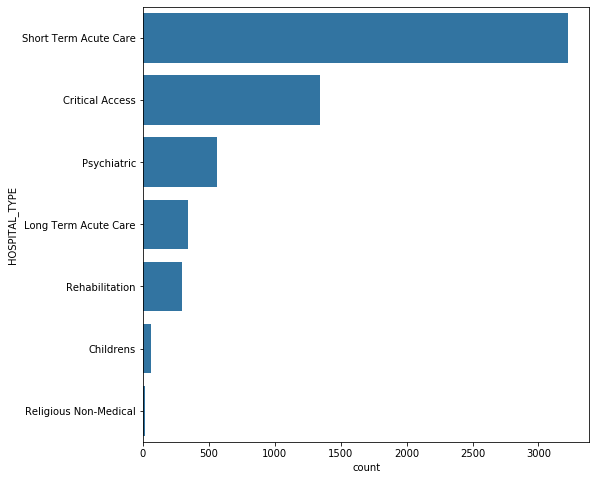

In [56]:
plt.figure(figsize=[8, 8])
base_color = sb.color_palette()[0]
hos_labels = ['Short Term Acute Care', 'Critical Access', 'Psychiatric', 'Long Term Acute Care', 'Rehabilitation', 'Childrens', 'Religious Non-Medical']
sb.countplot(data=beds_poverty_df, y='HOSPITAL_TYPE', color=base_color);
ax = plt.gca()
ax.set_yticklabels(hos_labels)
plt.show()

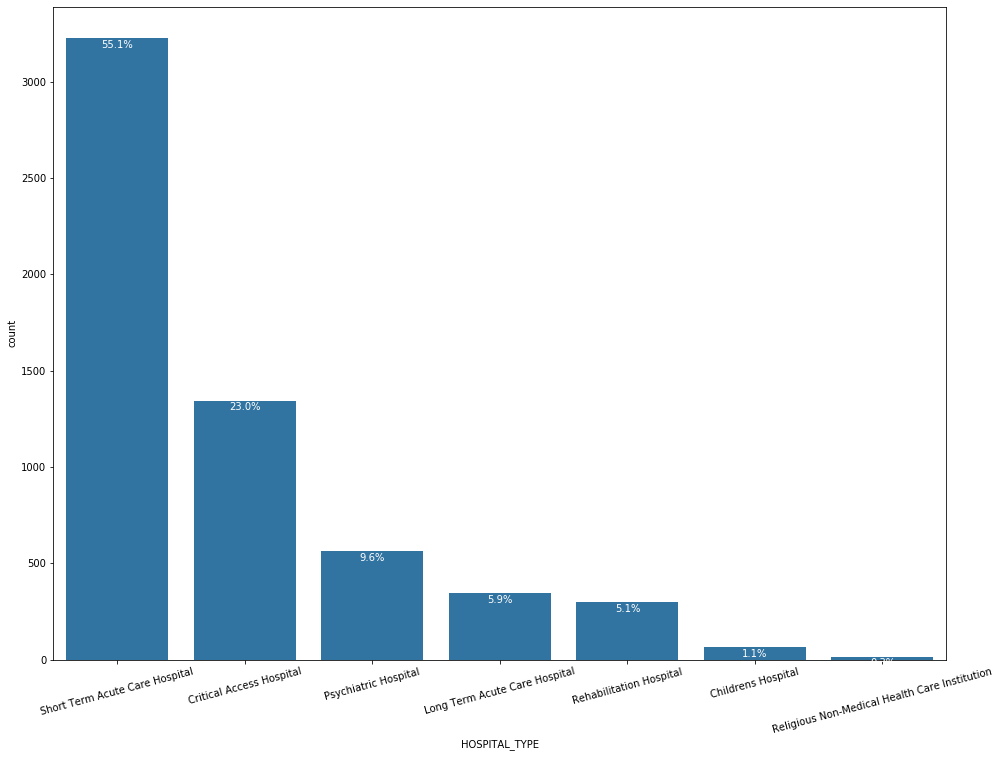

In [60]:
plt.figure(figsize=[16, 12])
#plt.rcParams["figure.figsize"] = [16,9]

base_color = sb.color_palette()[0]
sb.countplot(data=beds_poverty_df, x='HOSPITAL_TYPE', color=base_color);

hos_labels = ['Short Term Acute Care', 'Critical Access', 'Psychiatric', 'Long Term Acute Care', 'Rehabilitation', 'Childrens', 'Religious Non-Medical' ]

#ax = plt.gca()
#ax.set_xticklabels(hos_labels)


# add annotations
n_points = beds_poverty_df.shape[0]
cat_counts = beds_poverty_df['HOSPITAL_TYPE'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.xticks(rotation=15)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-50, pct_string, ha = 'center', color = 'w')

plt.show()

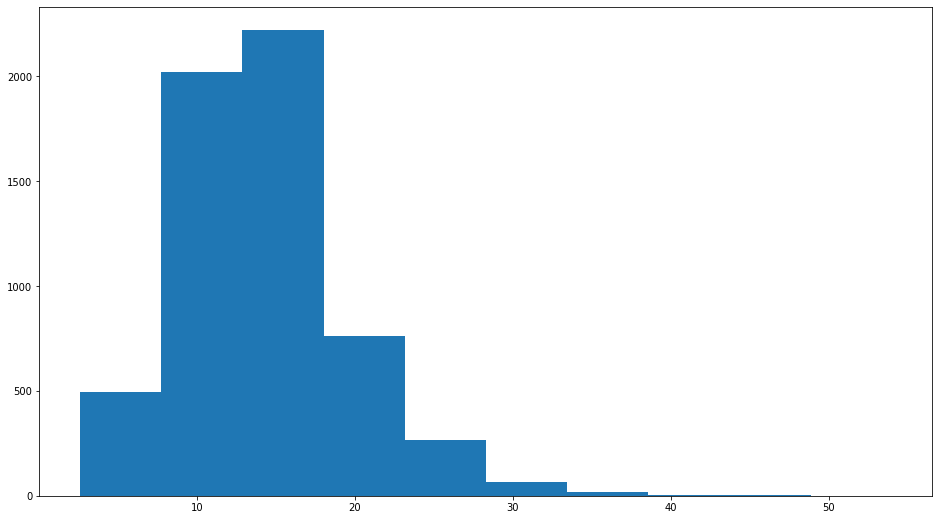

In [61]:
plt.hist(data=beds_poverty_df, x='PCTPOVALL_2018');

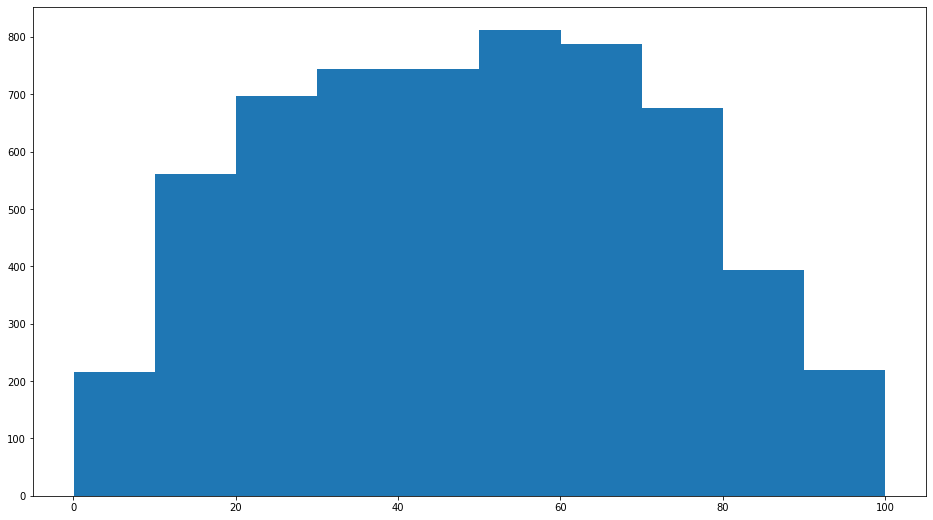

In [62]:
plt.hist(data=beds_poverty_df, x='PCTBED_UTILIZATION');

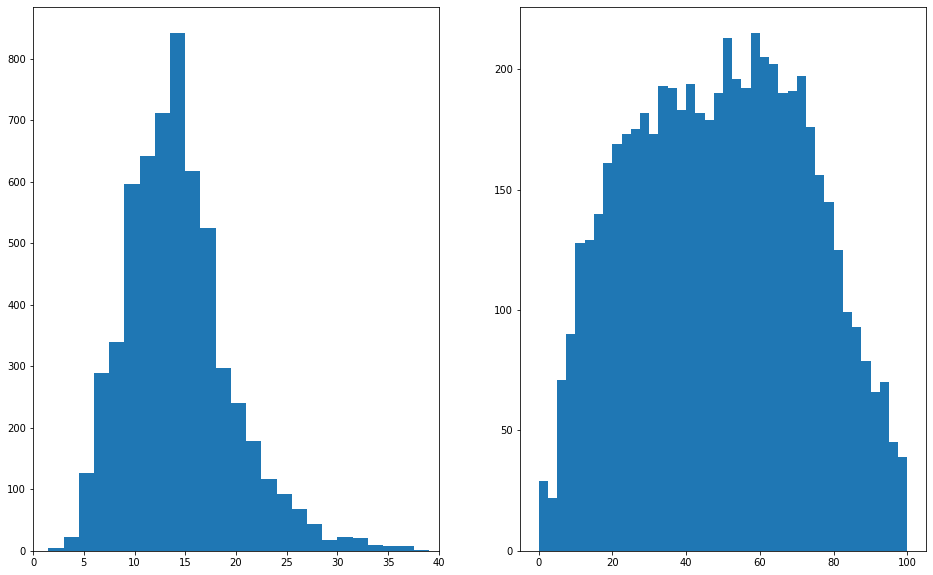

In [76]:
plt.figure(figsize = [16, 10])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, beds_poverty_df['PCTPOVALL_2018'].max()+1.5, 1.5)
plt.hist(data = beds_poverty_df, x = 'PCTPOVALL_2018', bins = bin_edges)
plt.xlim(0, 40)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, beds_poverty_df['PCTBED_UTILIZATION'].max()+2.5, 2.5)
plt.hist(data = beds_poverty_df, x = 'PCTBED_UTILIZATION', bins = bin_edges)
#plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))
plt.show()

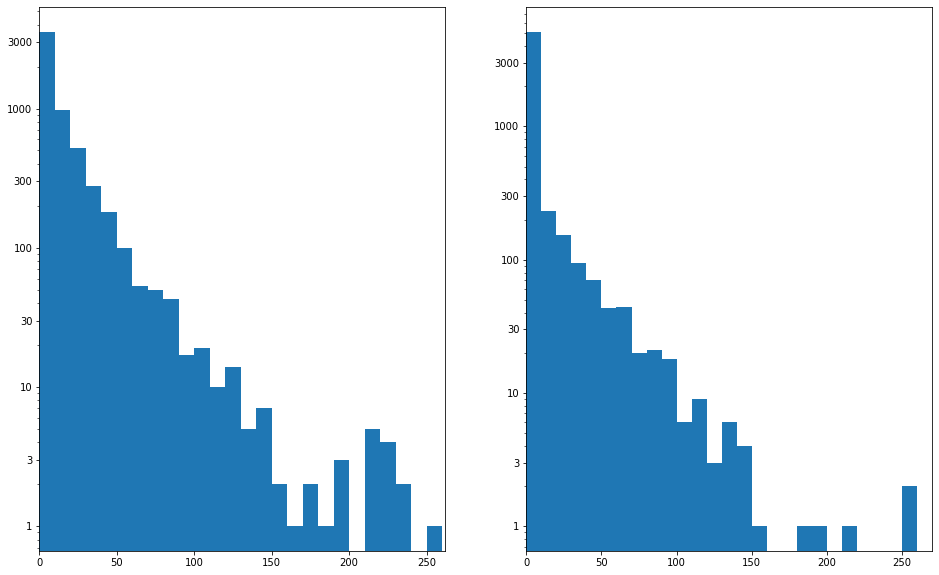

In [168]:
plt.figure(figsize = [16, 10])

tick_locs = [1,3, 10, 30, 100, 300, 1000, 3000]
# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, beds_poverty_df['ADULT_ICU_BEDS'].max()+10, 10)
plt.hist(data = beds_poverty_df, x = 'ADULT_ICU_BEDS', bins = bin_edges)
plt.yscale('log', nonposy='clip')
plt.xlim(0,beds_poverty_df['ADULT_ICU_BEDS'].max()+10)
plt.yticks(tick_locs, tick_locs)


# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0,  beds_poverty_df['PEDI_ICU_BEDS'].max()+10, 10)
plt.hist(data = beds_poverty_df, x = 'PEDI_ICU_BEDS', bins = bin_edges)
plt.yscale('log', nonposy='clip')
plt.xlim(0, beds_poverty_df['PEDI_ICU_BEDS'].max()+10) # could also be called as plt.xlim((0, 35))
plt.yticks(tick_locs, tick_locs)
plt.show()

In [89]:
beds_poverty_df[['ADULT_ICU_BEDS', 'PEDI_ICU_BEDS']].describe()

,ADULT_ICU_BEDS,PEDI_ICU_BEDS
count,5849.000000,5849.000000
mean,14.441785,4.917764
std,22.339442,16.835973
min,0.000000,0.000000
25%,4.000000,0.000000
50%,6.000000,0.000000
75%,17.000000,0.000000
max,252.000000,260.000000


In [150]:
beds_poverty_df[beds_poverty_df['ADULT_ICU_BEDS'].between(240, 260, inclusive=True)]['ADULT_ICU_BEDS'].count()

1

In [152]:
beds_poverty_df.groupby('ADULT_ICU_BEDS')['ADULT_ICU_BEDS'].count()

ADULT_ICU_BEDS
0       775
1       101
2       221
3       341
4      1006
       ... 
227       1
229       1
230       1
238       1
252       1
Name: ADULT_ICU_BEDS, Length: 149, dtype: int64

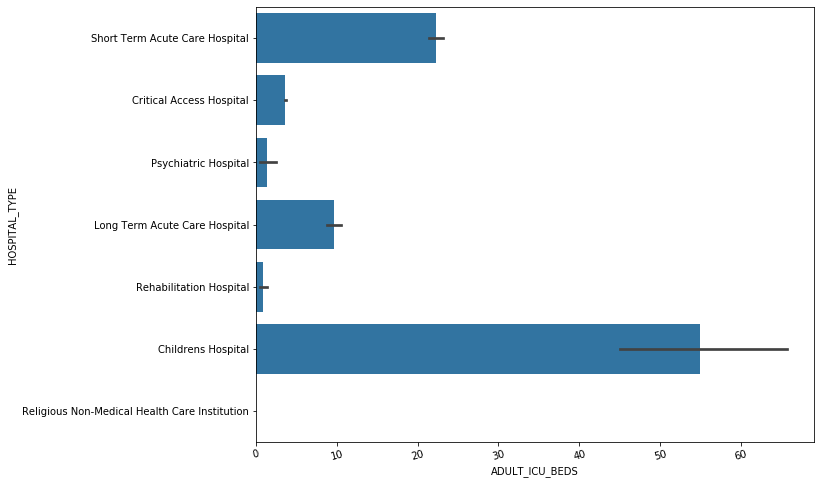

In [170]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,8])
sb.barplot(data=beds_poverty_df, y='HOSPITAL_TYPE', x='ADULT_ICU_BEDS', color=base_color)
plt.xticks(rotation=15);

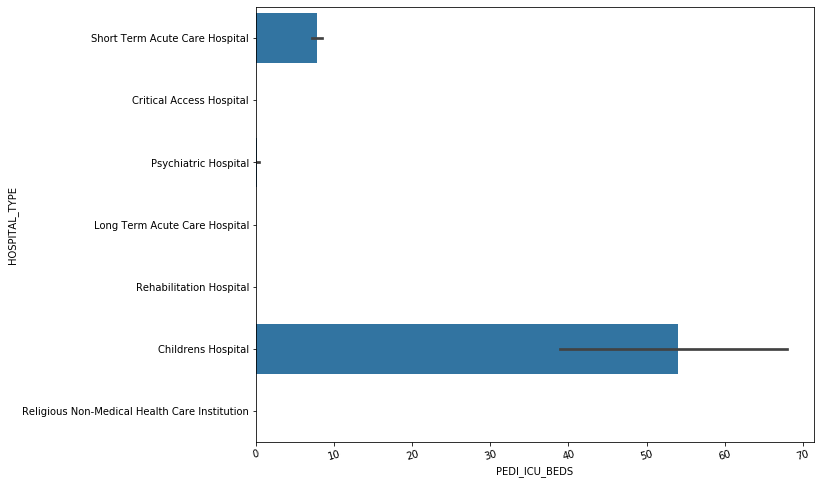

In [171]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,8])
sb.barplot(data=beds_poverty_df, y='HOSPITAL_TYPE', x='PEDI_ICU_BEDS', color=base_color)
plt.xticks(rotation=15);